# Workshop #2: Introduction to Statistical Modeling with Python

In [3]:
#For reading and manipulating tabular data
import numpy as np
import pandas as pd

#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

#For basic statistical modeling
import scipy as sp
import sklearn as sk

## I. Data Exploration

Read the data for the southern California real-estate listing in 2009. Do some basic exploration:
- how many observations (listings) are there? What is the dimension of the feature space of the data? Which variables are quantitative and which are categorical?
- do some basic exploration of the data:
  - what are the 'typical' values for the variables? What are the spreads of the variables? 
  - are there any interesting relationships between variables? Any trends? Any comparisons?
  - pose some interesting questions you can ask of the data 

In [4]:
#Read the data into a pandas dataframe
df = pd.read_csv('California_Home_Prices(2009).csv')

#Check the shape of the dataframe
df.shape

(781, 8)

In [5]:
#Check the first couple of rows in the dataframe
df.head()

,MSL#,Location,Price,Bedrooms,Bathrooms,Sqft,Price/Sqft,Status
0,132842,Arroyo Grande,795000,3.0,3,2371,335.30,Short Sale
1,134364,Paso Robles,399000,4.0,3,2818,141.59,Short Sale
2,135141,Paso Robles,545000,4.0,3,3032,179.75,Short Sale
3,135712,Morro Bay,909000,4.0,4,3540,256.78,Short Sale
4,136282,Santa Maria-Orcutt,109900,3.0,1,1249,87.99,Short Sale


In [5]:
#Find the unique values of a column
df['Bathrooms'].unique()

array([ 3,  4,  1,  2,  5,  7,  6, 11], dtype=int64)

### Descriptive Stats:

In [6]:
#Find the mean of a column
df['Sqft'].mean()

1755.0588988476313

In [8]:
#Find the range of a column
print (df['Price'].max(), df['Price'].min())

5499000 26500


In [9]:
#Find the standard devation of a column
df['Price'].std()

349038.1010714074

In [10]:
df.sort_values(["Price", "Location"], ascending=[False, True]).head()


,MSL#,Location,Price,Bedrooms,Bathrooms,Sqft,Price/Sqft,Status
753,154526,Arroyo Grande,5499000,4.0,5,5060,1086.76,Regular
727,154491,Cambria,2995000,5.0,4,3684,812.98,Regular
702,154463,San Luis Obispo,2369000,5.0,6,4174,567.56,Regular
692,154434,Cambria,2000000,4.0,4,3576,559.28,Regular
407,152768,Avila Beach,1999000,4.0,5,5307,376.67,Short Sale


### Data Visualization:

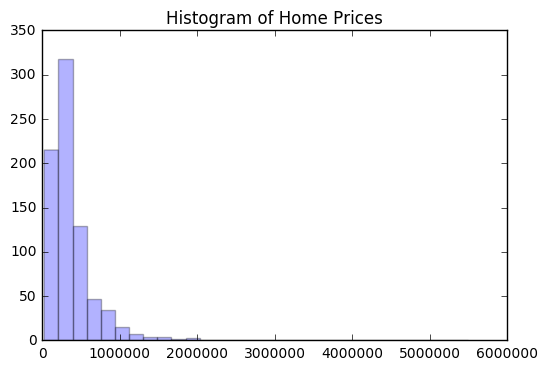

In [11]:
#Histogram the values in a column
plt.hist(df['Price'].values, bins=30, color='blue', alpha=0.3)
#Set plot title
plt.title('Histogram of Home Prices')
#Display plot
plt.show()

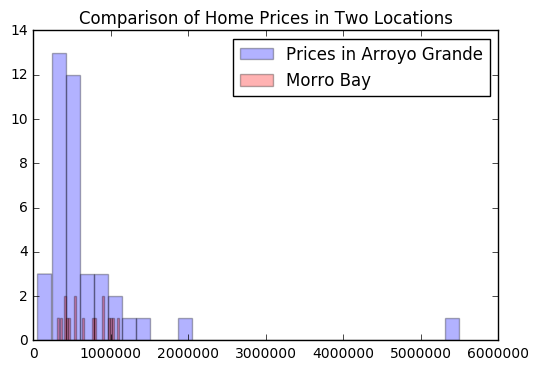

In [12]:
#Filter the dataframe
df_1 = df[df['Location'] == 'Arroyo Grande']
df_2 = df[df['Location'] == 'Morro Bay']

#Compare two histograms (un-normalized)
plt.hist(df_1['Price'].values, bins=30, color='blue', alpha=0.3, label='Prices in Arroyo Grande')
plt.hist(df_2['Price'].values, bins=30, color='red', alpha=0.3, label='Morro Bay')

#Set plot title
plt.title('Comparison of Home Prices in Two Locations')
#Create legend
plt.legend(loc='best')
#Display plot
plt.show()

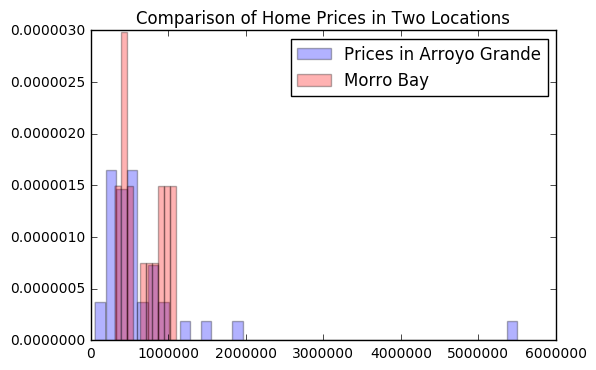

In [13]:
#Compare two histograms (normalized)
plt.hist(df_1['Price'].values, normed=True, bins=40, color='blue', alpha=0.3, label='Prices in Arroyo Grande')
plt.hist(df_2['Price'].values, normed=True, bins=10, color='red', alpha=0.3, label='Morro Bay')
#Set plot title
plt.title('Comparison of Home Prices in Two Locations')
#Create legend
plt.legend(loc='best')
#Display plot
plt.show()

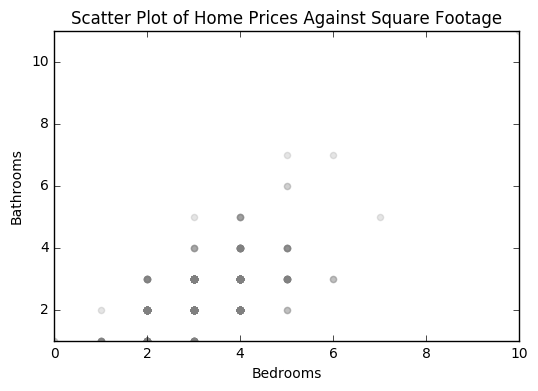

In [14]:
#Scatter plot two columns
plt.scatter(df['Bedrooms'].values, df['Bathrooms'].values, color='gray', alpha=0.2)
#Set plot title
plt.title('Scatter Plot of Home Prices Against Square Footage')
#Set axes labels
plt.xlabel('Bedrooms')
plt.ylabel('Bathrooms')
#Set axes limits
plt.xlim([df['Bedrooms'].min(), df['Bedrooms'].max()])
plt.ylim([df['Bathrooms'].min(), df['Bathrooms'].max()])
#Display plot
plt.show()

## II. Sampling a Random Variable

Suppose the price, $P$ is a random variable that is defined as
$$
P = mA + b + \epsilon 
$$
where $A$ is the square footage and $\epsilon$ is the random noise.

If we know that $\epsilon$ is normally distributed, with mean 0 and standard deviation $\sigma$. Then what is the distribution of $P$?

Let's answer this by experimenting and guessing.

In [7]:
#Sample 1000 values of epsilon from a normal distribution 
#(this is like making 100 observations of a random variable)
#For random sampling, we use numpy's random library

#variance of epsilon
variance = 1.
epsilon_observations = np.random.normal(0, 1, size = 1000)

#let's set A, m and b
A = 1755
m = 2 
b = 10

#Now we have 1000 observations of P, one for each epsilon
P_observations = m * A + b + epsilon_observations

print ('m * A + b = ', m * A + b)

m * A + b =  3520


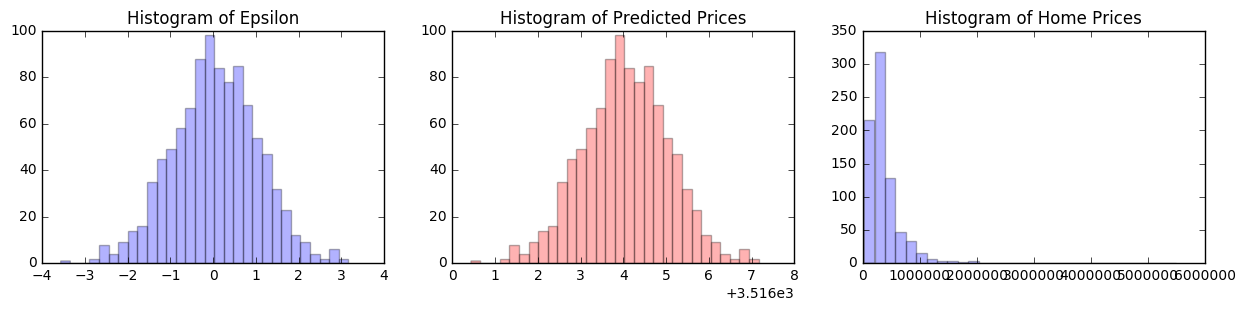

In [8]:
#Create a figure with two subplots, sitting in the same row
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))

#Histogram the epsilon samples
ax1.hist(epsilon_observations, bins=30, color='blue', alpha=0.3)
#Set plot title
ax1.set_title('Histogram of Epsilon')

#Histogram the mA + b + epsilon
ax2.hist(P_observations, bins=30, color='red', alpha=0.3)
#Set plot title
ax2.set_title('Histogram of Predicted Prices')

#Histogram the values in a column
ax3.hist(df['Price'].values, bins=30, color='blue', alpha=0.3)
#Set plot title
ax3.set_title('Histogram of Home Prices')

#Display plot
plt.show()

## III. The Likelihood Function

We've learned that if Price, $P$, is defined by
$$
P = mA + b + \epsilon
$$
then $P$ is normally distributed if $\epsilon$ is. So how can we use this information to fit our model?

Let's pretend our data has only one observation: $P$ = \$1.0 million and $A = 100$. Consider the following two models, 
1. m=20, b=-10
2. m=2, b=10

which one is more likely to be the true model for this observation?

In [17]:
#Let's see how likely is our observation under each model
#Recall that the price is normally distributed P|A, m, b, epsilon ~ N(mA + b, sigma^2)
#So the normal pdf should tell us how likely are we to observe a price for a square footage given a certain model
#We use the stats library from Scipy to create our normal models
variance = 1.
A = 100
P = 1.

from scipy import stats

model_1 = sp.stats.norm(0.001 * A + 0.1, variance)
model_2 = sp.stats.norm(.2 * A + 0.01, variance)

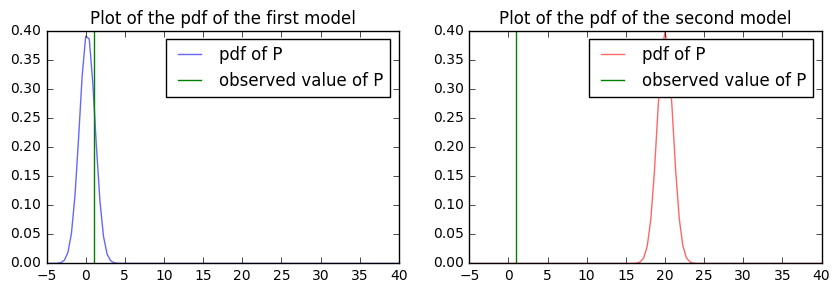

In [18]:
#create a range of prices
P_s = np.linspace(-5, 40, 100)

#Create a figure with two subplots, sitting in the same row
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

#Histogram the epsilon samples
ax1.plot(P_s, model_1.pdf(P_s), color='blue', alpha=0.6, label='pdf of P')
ax1.axvline(x=P, color='green', label='observed value of P')
#Set plot title and legend
ax1.set_title('Plot of the pdf of the first model')
ax1.legend(loc='best')


#Histogram the mA + b + epsilon
ax2.plot(P_s, model_2.pdf(P_s), color='red', alpha=0.6, label='pdf of P')
ax2.axvline(x=P, color='green', label='observed value of P')
#Set plot title and legend
ax2.set_title('Plot of the pdf of the second model')
ax2.legend(loc='best')

#Display plot
plt.show()

In [ ]:
print 'likelihood of data under model 1:', model_1.pdf(P)
print 'likelihood of data under model 2:', model_2.pdf(P)

## IV. Linear and Polynomial Regression

Now we know we want to find the model, $m$ and $b$, that makes our observed data most likely - that is, we want Maximum Likelihood Estimators of the model parameters $m$ and $b$. Luckily finding there is a `python` library for finding MLE linear (and polynomial) models: `sklearn`.

In [11]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
X = df['Sqft'].values
y = df['Price'].values

#First break up your data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print (X_train.shape, y_train.shape)

(546,) (546,)


In [13]:
#Fit a linear regression model on the train data, i.e. find the MLE model

#create an instance of a linear regression object
linear_model = LinearRegression()
#fit the linear regression model to our training data
#you need to worry about the shape of X_train!!!!
linear_model.fit(X_train.reshape((len(X_train), 1)), y_train)

#make predictions using our training data
y_train_predict = linear_model.predict(X_train.reshape((len(X_train), 1)))
#make predictions using our testing data
y_test_predict = linear_model.predict(X_test.reshape((len(X_test), 1)))

#compute error
train_error = np.mean((y_train - y_train_predict)**2)
test_error = np.mean((y_test - y_test_predict)**2)

print ('error on training set:', train_error)
print ('error on testing set:', test_error)

error on training set: 45723701171.0
error on testing set: 119976833723.0


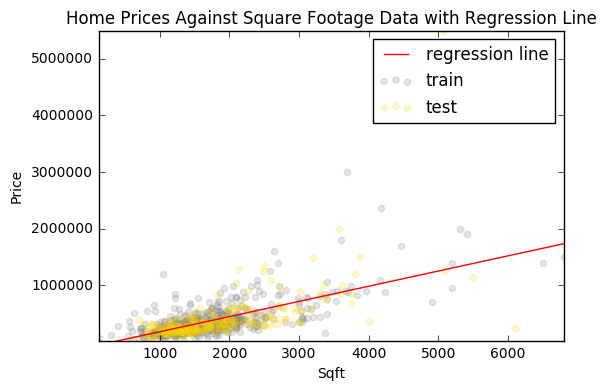

In [14]:
X_s = np.linspace(df['Sqft'].min(), df['Sqft'].max(), 100)
#get the slope and intercept we found for the model
m = linear_model.coef_ 
b = linear_model.intercept_

#Plot data against MLE model
plt.scatter(X_train, y_train, color='gray', alpha=0.2, label='train')
plt.scatter(X_test, y_test, color='gold', alpha=0.2, label='test')
plt.plot(X_s, m * X_s + b, color='red', label='regression line')
#Set plot title
plt.title('Home Prices Against Square Footage Data with Regression Line')
#Set axes labels
plt.xlabel('Sqft')
plt.ylabel('Price')
#Set axes limits
plt.xlim([df['Sqft'].min(), df['Sqft'].max()])
plt.ylim([df['Price'].min(), df['Price'].max()])
#Display plot
plt.legend(loc='best')
plt.show()

In [15]:
X_s

array([  120.        ,   187.47474747,   254.94949495,   322.42424242,
         389.8989899 ,   457.37373737,   524.84848485,   592.32323232,
         659.7979798 ,   727.27272727,   794.74747475,   862.22222222,
         929.6969697 ,   997.17171717,  1064.64646465,  1132.12121212,
        1199.5959596 ,  1267.07070707,  1334.54545455,  1402.02020202,
        1469.49494949,  1536.96969697,  1604.44444444,  1671.91919192,
        1739.39393939,  1806.86868687,  1874.34343434,  1941.81818182,
        2009.29292929,  2076.76767677,  2144.24242424,  2211.71717172,
        2279.19191919,  2346.66666667,  2414.14141414,  2481.61616162,
        2549.09090909,  2616.56565657,  2684.04040404,  2751.51515152,
        2818.98989899,  2886.46464646,  2953.93939394,  3021.41414141,
        3088.88888889,  3156.36363636,  3223.83838384,  3291.31313131,
        3358.78787879,  3426.26262626,  3493.73737374,  3561.21212121,
        3628.68686869,  3696.16161616,  3763.63636364,  3831.11111111,
      

In [ ]:
#Try fitting a multiple linear regression model

In [24]:
from sklearn.preprocessing import PolynomialFeatures

#Try fitting a polynomial regression model. Hint: remember that a polynomial model is secretly a linear model
degree = 2

#create a tool for turning one variable, square footage, into multiple variables, A^2, A^3, etc
poly = PolynomialFeatures(degree)
#add polynomial terms to our training data
X_train_poly = poly.fit_transform(X_train.reshape((len(X_train), 1)))
#add polynomial terms to our testing data
X_test_poly = poly.fit_transform(X_test.reshape((len(X_test), 1)))

print (X_train_poly.shape, X_test_poly.shape)

#now use X_train_poly, X_test_poly to fit a linear model just like in the above!

(546, 3) (235, 3)


array([[  1.00000000e+00,   1.38000000e+03,   1.90440000e+06],
       [  1.00000000e+00,   9.00000000e+02,   8.10000000e+05],
       [  1.00000000e+00,   1.90000000e+03,   3.61000000e+06],
       ..., 
       [  1.00000000e+00,   1.41000000e+03,   1.98810000e+06],
       [  1.00000000e+00,   1.59300000e+03,   2.53764900e+06],
       [  1.00000000e+00,   1.31000000e+03,   1.71610000e+06]])

In [25]:
poly.fit(X_train_poly, y_train)

#compute error
train_error = np.mean((y_train_poly - y_train_predict)**2)
test_error = np.mean((y_test - y_test_predict)**2)

print ('error on training set:', train_error)
print ('error on testing set:', test_error)

NameError: name 'y_train_poly' is not defined